In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

warnings.filterwarnings("ignore")

C:\Users\fedi1\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\fedi1\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\fedi1\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data import
----

In [2]:
bulk_movement = pd.read_excel('Bulk_movement.xls')

In [3]:
bulk_product = pd.read_excel('BULK_PRODUCT.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [4]:
tank1 = pd.read_excel('TANK1.xlsx')

# Columns to keep
----

In [5]:
columns_to_keep_bulk_movement = ['BULK_MOVEMENT_ID','FOLIO_NUMBER','FROM_SUPPLIER_NUMBER','TO_SUPPLIER_NUMBER','TYPE','MOVEMENT_NUMBER','MOVEMENT_DATE','AIC_STATUS']

In [6]:
# Keep specific columns
bulk_movement = bulk_movement[columns_to_keep_bulk_movement]
# Check for NaN values in each feature (column) of the order_recipe_merge DataFrame
nan_counts = bulk_movement.isna().sum()

# Print the NaN counts for each feature
print("NaN counts for each feature:")
print(nan_counts)

bulk_movement = bulk_movement.dropna(subset=['FOLIO_NUMBER'])

NaN counts for each feature:
BULK_MOVEMENT_ID          0
FOLIO_NUMBER             25
FROM_SUPPLIER_NUMBER    730
TO_SUPPLIER_NUMBER        0
TYPE                      0
MOVEMENT_NUMBER           0
MOVEMENT_DATE             0
AIC_STATUS                0
dtype: int64


In [7]:
columns_to_keep_bulk_product = ['BULK_MOVEMENT_ID','TERMINAL_PRODUCT_NUMBER','CONTAINER_CODE','FIGURES_TYPE','GROSS_QUANTITY','NET_QUANTITY','TEMPERATURE','END_DATE']

In [8]:
# Keep specific columns
bulk_product = bulk_product[columns_to_keep_bulk_product]
# Check for NaN values in each feature (column) of the order_recipe_merge DataFrame
nan_counts = bulk_product.isna().sum()

# Print the NaN counts for each feature
print("NaN counts for each feature:")
print(nan_counts)


NaN counts for each feature:
BULK_MOVEMENT_ID           0
TERMINAL_PRODUCT_NUMBER    0
CONTAINER_CODE             0
FIGURES_TYPE               0
GROSS_QUANTITY             0
NET_QUANTITY               0
TEMPERATURE                0
END_DATE                   0
dtype: int64


In [9]:
columns_to_keep_tank1 = ['TANK_CODE','NAME','SHELL_CAPACITY','TERMINAL_PRODUCT_NUMBER']

In [10]:
# Keep specific columns
tank1 = tank1[columns_to_keep_tank1]
# Check for NaN values in each feature (column) of the order_recipe_merge DataFrame
nan_counts = tank1.isna().sum()

# Print the NaN counts for each feature
print("NaN counts for each feature:")
print(nan_counts)


NaN counts for each feature:
TANK_CODE                  0
NAME                       0
SHELL_CAPACITY             0
TERMINAL_PRODUCT_NUMBER    0
dtype: int64


In [11]:
merged_bulk = pd.merge(bulk_movement, bulk_product, on='BULK_MOVEMENT_ID', how='inner')

In [12]:
merged_bulk = merged_bulk.dropna(subset=['FOLIO_NUMBER'])

# Reset index if needed
merged_bulk.reset_index(drop=True, inplace=True)

In [13]:
merged_bulk

,BULK_MOVEMENT_ID,FOLIO_NUMBER,FROM_SUPPLIER_NUMBER,TO_SUPPLIER_NUMBER,TYPE,MOVEMENT_NUMBER,MOVEMENT_DATE,AIC_STATUS,TERMINAL_PRODUCT_NUMBER,CONTAINER_CODE,FIGURES_TYPE,GROSS_QUANTITY,NET_QUANTITY,TEMPERATURE,END_DATE
0,22545,20210928.0,NaN,1,1,519,2021-09-28 06:56:15,1,8,TK-100,1,100000,100000,15.0,2021-09-28 06:56:32
1,22545,20210928.0,NaN,1,1,519,2021-09-28 06:56:15,1,9,TK-200,1,100000,100000,15.0,2021-09-28 06:57:30
2,23263,20210928.0,NaN,5,1,536,2021-09-28 08:22:41,1,12,TK-300,1,1000000000,1000000000,15.0,2021-09-28 08:23:08
3,23263,20210928.0,NaN,5,1,536,2021-09-28 08:22:41,1,13,TK-400,1,10000000,10000000,15.0,2021-09-28 08:24:17
4,23513,20210928.0,NaN,8,1,541,2021-09-28 08:59:36,1,10,TK-500,1,10000000,10000000,15.0,2021-09-28 08:59:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,3091853,20230718.0,NaN,12,1,71839,2023-07-18 15:08:10,1,7,TK-103,4,5802730,5802730,15.0,2023-07-18 15:08:19
727,3091864,20230718.0,NaN,14,1,71840,2023-07-18 15:10:33,1,4,TK-105,1,100000,100000,15.0,2023-07-18 15:10:49
728,3091881,20230718.0,NaN,15,1,71841,2023-07-18 15:12:43,1,7,TK-102,4,-13192,-13192,15.0,2023-07-18 15:12:49
729,3091891,20230718.0,NaN,19,1,71842,2023-07-18 15:14:41,1,4,TK-106,4,100085,100085,15.0,2023-07-18 15:14:48


In [14]:
merged_bulk=merged_bulk[merged_bulk['GROSS_QUANTITY']>0]

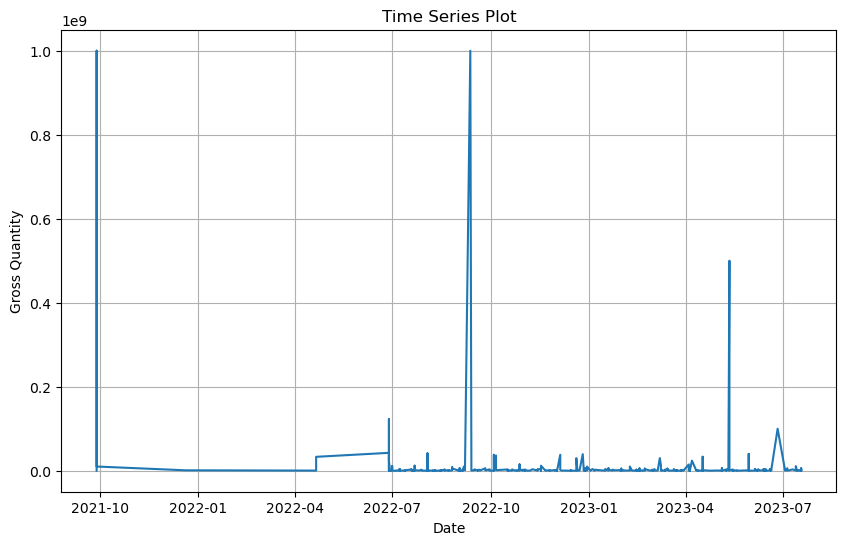

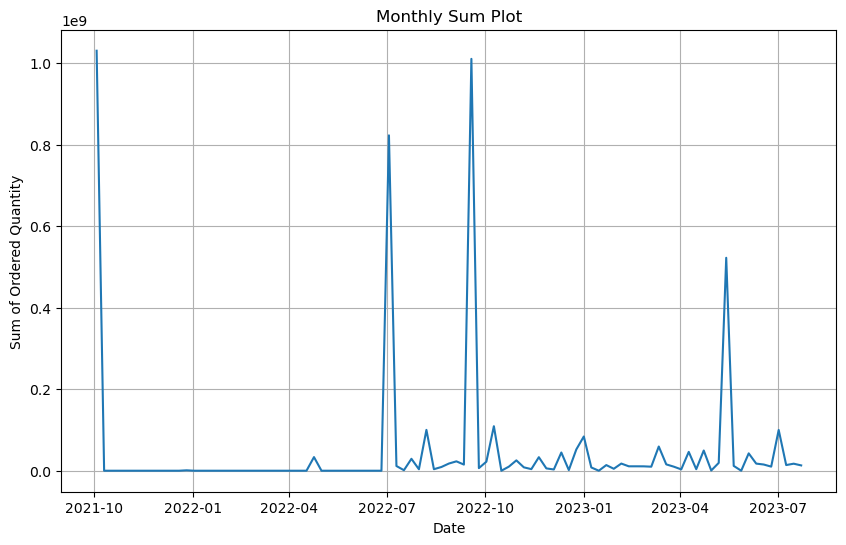

In [15]:
# Convert FOLIO_NUMBER to datetime format
merged_bulk['FOLIO_NUMBER'] = pd.to_datetime(merged_bulk['FOLIO_NUMBER'], format='%Y%m%d')

# Create xts_data for plotting
xts_data = pd.Series(merged_bulk['GROSS_QUANTITY'].values, index=merged_bulk['FOLIO_NUMBER'])

# Plot time series data
plt.figure(figsize=(10, 6))
plt.plot(xts_data)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Gross Quantity')
plt.grid(True)
plt.show()

# Calculate monthly sum
product_data_monthly = xts_data.resample('W').sum()

# Plot monthly sum
plt.figure(figsize=(10, 6))
plt.plot(product_data_monthly)
plt.title('Monthly Sum Plot')
plt.xlabel('Date')
plt.ylabel('Sum of Ordered Quantity')
plt.grid(True)
plt.show()

In [16]:
merged_bulk.columns

Index(['BULK_MOVEMENT_ID', 'FOLIO_NUMBER', 'FROM_SUPPLIER_NUMBER',
       'TO_SUPPLIER_NUMBER', 'TYPE', 'MOVEMENT_NUMBER', 'MOVEMENT_DATE',
       'AIC_STATUS', 'TERMINAL_PRODUCT_NUMBER', 'CONTAINER_CODE',
       'FIGURES_TYPE', 'GROSS_QUANTITY', 'NET_QUANTITY', 'TEMPERATURE',
       'END_DATE'],
      dtype='object')

In [17]:
# Find common folio numbers
common_tanks = merged_bulk['CONTAINER_CODE'][merged_bulk['CONTAINER_CODE'].isin(tank1['TANK_CODE'])]

# Remove duplicates
common_tanks = common_tanks.drop_duplicates()

# Reset index if needed
common_tanks.reset_index(drop=True, inplace=True)

In [18]:
common_tanks

0     TK-100
1     TK-200
2     TK-300
3     TK-400
4     TK-500
5     TK-600
6     TK-101
7     TK-102
8     TK-105
9     TK-103
10    TK-106
11    TK-201
12    TK-104
13    TK-202
Name: CONTAINER_CODE, dtype: object

In [19]:
tank1['TANK_CODE'].unique()

array(['TK-100', 'TK-101', 'TK-102', 'TK-103', 'TK-104', 'TK-105',
       'TK-106', 'TK-200', 'TK-201', 'TK-202', 'TK-203', 'TK-204',
       'TK-205', 'TK-206', 'TK-300', 'TK-301', 'TK-302', 'TK-303',
       'TK-400', 'TK-500', 'TK-600'], dtype=object)

In [20]:
# Merge the DataFrames based on the condition
merged_bulk_t = pd.merge(merged_bulk, tank1[['TANK_CODE', 'NAME']], left_on='CONTAINER_CODE', right_on='TANK_CODE', how='inner')


In [21]:
merged_bulk_t

,BULK_MOVEMENT_ID,FOLIO_NUMBER,FROM_SUPPLIER_NUMBER,TO_SUPPLIER_NUMBER,TYPE,MOVEMENT_NUMBER,MOVEMENT_DATE,AIC_STATUS,TERMINAL_PRODUCT_NUMBER,CONTAINER_CODE,FIGURES_TYPE,GROSS_QUANTITY,NET_QUANTITY,TEMPERATURE,END_DATE,TANK_CODE,NAME
0,22545,2021-09-28,NaN,1,1,519,2021-09-28 06:56:15,1,8,TK-100,1,100000,100000,15.0,2021-09-28 06:56:32,TK-100,ADD GO AFR
1,22545,2021-09-28,NaN,1,1,519,2021-09-28 06:56:15,1,9,TK-200,1,100000,100000,15.0,2021-09-28 06:57:30,TK-200,ADD MOG AFR
2,23263,2021-09-28,NaN,5,1,536,2021-09-28 08:22:41,1,12,TK-300,1,1000000000,1000000000,15.0,2021-09-28 08:23:08,TK-300,ADD GO OLA
3,23263,2021-09-28,NaN,5,1,536,2021-09-28 08:22:41,1,13,TK-400,1,10000000,10000000,15.0,2021-09-28 08:24:17,TK-400,ADD MOG OLA
4,23513,2021-09-28,NaN,8,1,541,2021-09-28 08:59:36,1,10,TK-500,1,10000000,10000000,15.0,2021-09-28 08:59:44,TK-500,ADD GO TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,3091837,2023-07-18,NaN,5,1,71837,2023-07-18 15:03:54,1,7,TK-103,4,2478739,2478739,15.0,2023-07-18 15:04:03,TK-103,GASOIL
578,3091845,2023-07-18,NaN,12,1,71838,2023-07-18 15:07:00,1,4,TK-105,4,761848,761848,15.0,2023-07-18 15:07:07,TK-105,MOGAS
579,3091853,2023-07-18,NaN,12,1,71839,2023-07-18 15:08:10,1,7,TK-103,4,5802730,5802730,15.0,2023-07-18 15:08:19,TK-103,GASOIL
580,3091864,2023-07-18,NaN,14,1,71840,2023-07-18 15:10:33,1,4,TK-105,1,100000,100000,15.0,2023-07-18 15:10:49,TK-105,MOGAS


In [22]:
merged_bulk_t.columns

Index(['BULK_MOVEMENT_ID', 'FOLIO_NUMBER', 'FROM_SUPPLIER_NUMBER',
       'TO_SUPPLIER_NUMBER', 'TYPE', 'MOVEMENT_NUMBER', 'MOVEMENT_DATE',
       'AIC_STATUS', 'TERMINAL_PRODUCT_NUMBER', 'CONTAINER_CODE',
       'FIGURES_TYPE', 'GROSS_QUANTITY', 'NET_QUANTITY', 'TEMPERATURE',
       'END_DATE', 'TANK_CODE', 'NAME'],
      dtype='object')

In [23]:
# Assuming merged_bulk_t is your DataFrame and columns_to_remove_merged_bulk_t contains columns to be removed
columns_to_remove_merged_bulk_t = ['TANK_CODE', 'TERMINAL_PRODUCT_NUMBER']

# Drop the columns
merged_bulk_t.drop(columns=columns_to_remove_merged_bulk_t, inplace=True)

In [24]:
merged_bulk_t.rename(columns={'NAME': 'PRODUCT_NAME'}, inplace=True)

In [25]:
merged_bulk_t['PRODUCT_NAME'].unique()

array(['ADD GO AFR', 'ADD MOG AFR', 'ADD GO OLA', 'ADD MOG OLA',
       'ADD GO TOTAL', 'ADD MOG TOTAL', 'GASOIL', 'MOGAS'], dtype=object)

In [26]:
# List of unique products
unique_products = merged_bulk_t['PRODUCT_NAME'].unique()

# Create a dictionary to store time series data for each product
product_time_series = {}

# Iterate over each unique product
for product in unique_products:
    # Filter data for the current product
    product_data = merged_bulk_t[merged_bulk_t['PRODUCT_NAME'] == product]
    
    # Aggregate data based on date (FOLIO_NUMBER)
    time_series = product_data.groupby('FOLIO_NUMBER')['GROSS_QUANTITY'].sum()
    
    # Store the time series data in the dictionary
    product_time_series[product] = time_series

# Access time series for each product and display the length
for product, time_series in product_time_series.items():
    print(f"Length of time series for {product}: {len(time_series)}")


Length of time series for ADD GO AFR: 2
Length of time series for ADD MOG AFR: 2
Length of time series for ADD GO OLA: 1
Length of time series for ADD MOG OLA: 1
Length of time series for ADD GO TOTAL: 4
Length of time series for ADD MOG TOTAL: 3
Length of time series for GASOIL: 130
Length of time series for MOGAS: 94


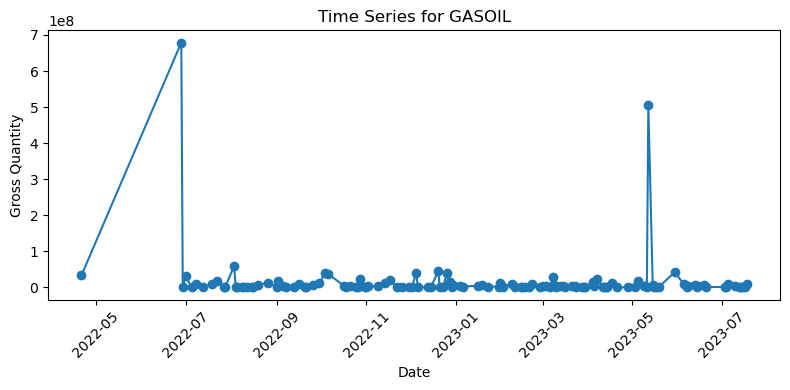

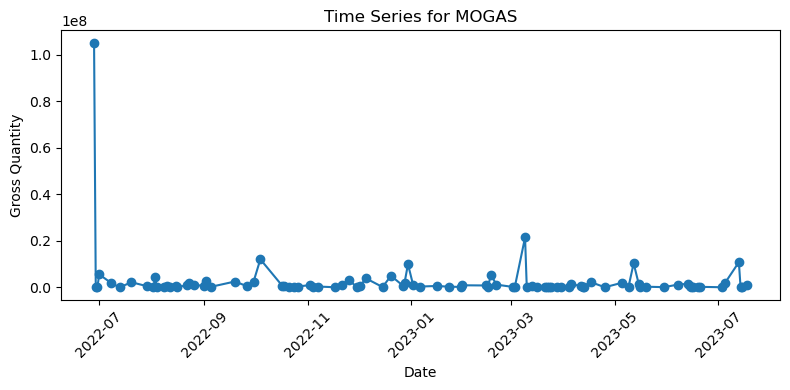

In [27]:
# Iterate over each unique product
for product in ['GASOIL','MOGAS']:
    # Filter data for the current product
    product_data = merged_bulk_t[merged_bulk_t['PRODUCT_NAME'] == product]
    
    # Aggregate data based on date (FOLIO_NUMBER)
    time_series = product_data.groupby('FOLIO_NUMBER')['GROSS_QUANTITY'].sum()
    
    # Plot time series for the current product
    plt.figure(figsize=(8, 4))
    plt.plot(time_series.index, time_series.values, marker='o')
    plt.title(f'Time Series for {product}')
    plt.xlabel('Date')
    plt.ylabel('Gross Quantity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [28]:
product_gasoil = merged_bulk_t[merged_bulk_t['PRODUCT_NAME'] == 'GASOIL']

In [29]:
product_mogas = merged_bulk_t[merged_bulk_t['PRODUCT_NAME'] == 'MOGAS']

# GASOIL

In [30]:
product_gasoil.head()

,BULK_MOVEMENT_ID,FOLIO_NUMBER,FROM_SUPPLIER_NUMBER,TO_SUPPLIER_NUMBER,TYPE,MOVEMENT_NUMBER,MOVEMENT_DATE,AIC_STATUS,CONTAINER_CODE,FIGURES_TYPE,GROSS_QUANTITY,NET_QUANTITY,TEMPERATURE,END_DATE,PRODUCT_NAME
6,948737,2022-04-21,1.0,1,1,22481,2022-04-22 11:34:09,1,TK-101,4,330866,330000,18.0,2022-04-22 11:34:22,GASOIL
7,948737,2022-04-21,1.0,1,1,22481,2022-04-22 11:34:09,1,TK-102,4,33086687,33000000,18.0,2022-04-22 11:35:43,GASOIL
8,1223004,2022-06-28,NaN,13,1,29185,2022-06-28 17:04:37,1,TK-101,4,42596160,42596160,15.0,2022-06-28 17:07:06,GASOIL
11,1223066,2022-06-28,NaN,8,1,29188,2022-06-28 17:14:16,1,TK-103,4,122215384,122215384,15.0,2022-06-28 17:14:22,GASOIL
12,1223104,2022-06-28,NaN,8,1,29189,2022-06-28 17:16:04,1,TK-101,4,13000000,13000000,15.0,2022-06-28 17:16:12,GASOIL


In [31]:
product_gasoil_group_by = product_gasoil.groupby('FOLIO_NUMBER')['GROSS_QUANTITY'].sum()
product_gasoil_group_by

FOLIO_NUMBER
2022-04-21     33417553
2022-06-28    678830576
2022-06-29      1124635
2022-07-01     31678739
2022-07-05       360000
                ...    
2023-07-13       500000
2023-07-14       329471
2023-07-15      2000000
2023-07-17      1329684
2023-07-18     10760208
Name: GROSS_QUANTITY, Length: 130, dtype: int64

In [32]:
import pandas as pd

# Assuming your DataFrame is named product_gasoil_group_by
# Convert the index to datetime if it's not already in datetime format
product_gasoil_group_by.index = pd.to_datetime(product_gasoil_group_by.index)

# Create a date range from the earliest date to the latest date in the index
date_range = pd.date_range(start=product_gasoil_group_by.index.min(), end=product_gasoil_group_by.index.max())

# Reindex the DataFrame with the date range
product_gasoil_group_by = product_gasoil_group_by.reindex(date_range, fill_value=0)

# Now product_gasoil_group_by will contain all dates within the range with values filled with 0 for missing dates
print(product_gasoil_group_by)


2022-04-21    33417553
2022-04-22           0
2022-04-23           0
2022-04-24           0
2022-04-25           0
                ...   
2023-07-14      329471
2023-07-15     2000000
2023-07-16           0
2023-07-17     1329684
2023-07-18    10760208
Freq: D, Name: GROSS_QUANTITY, Length: 454, dtype: int64


In [33]:
product_gasoil_group_by.to_csv('product_gasoil_grouped.csv')

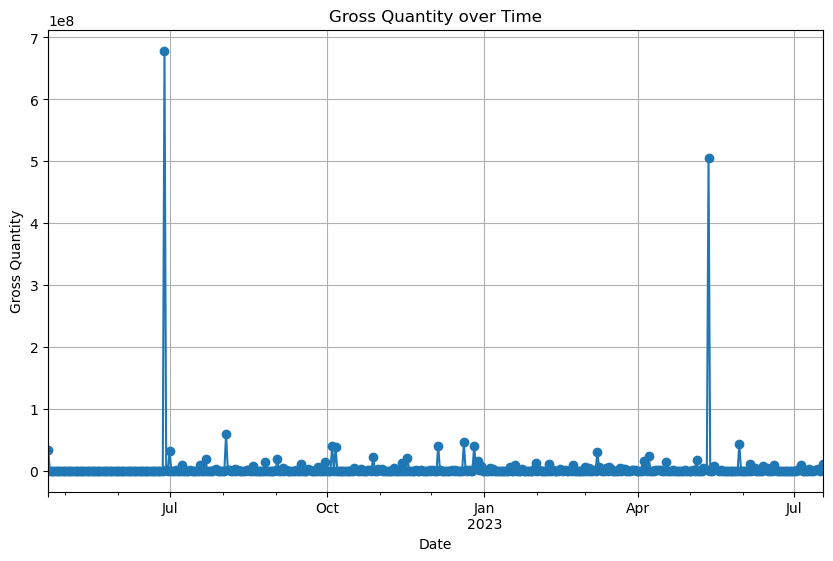

In [34]:
# Assuming sorted_product_gasoil is your Pandas Series
product_gasoil_group_by.plot(figsize=(10, 6), marker='o', linestyle='-')
plt.title('Gross Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Gross Quantity')
plt.grid(True)
plt.show()

In [35]:
trimmed_product_gasoil = product_gasoil_group_by.iloc[2:]

In [36]:
trimmed_product_gasoil

2022-04-23           0
2022-04-24           0
2022-04-25           0
2022-04-26           0
2022-04-27           0
                ...   
2023-07-14      329471
2023-07-15     2000000
2023-07-16           0
2023-07-17     1329684
2023-07-18    10760208
Freq: D, Name: GROSS_QUANTITY, Length: 452, dtype: int64

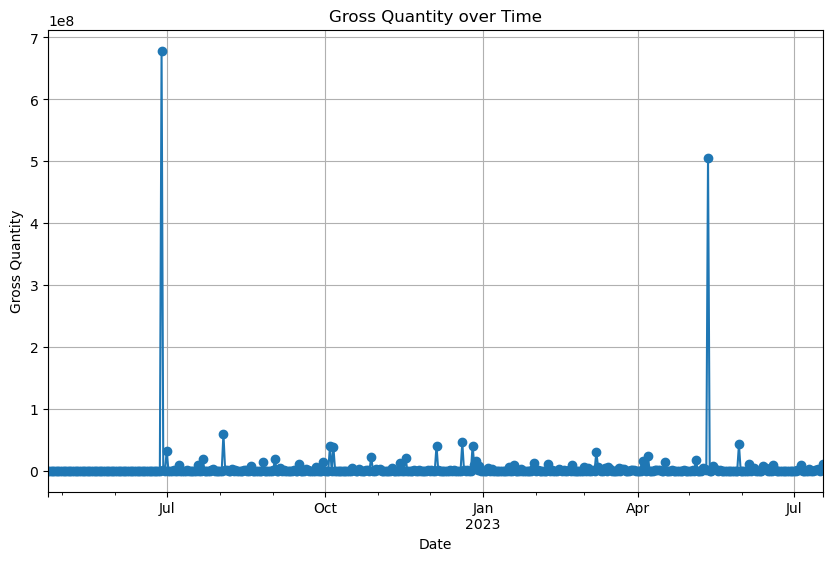

In [37]:
# Assuming sorted_product_gasoil is your Pandas Series
trimmed_product_gasoil.plot(figsize=(10, 6), marker='o', linestyle='-')
plt.title('Gross Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Gross Quantity')
plt.grid(True)
plt.show()

In [38]:
filtered_product_gasoil = trimmed_product_gasoil[trimmed_product_gasoil <= 478830576]

In [39]:
filtered_product_gasoil


2022-04-23           0
2022-04-24           0
2022-04-25           0
2022-04-26           0
2022-04-27           0
                ...   
2023-07-14      329471
2023-07-15     2000000
2023-07-16           0
2023-07-17     1329684
2023-07-18    10760208
Name: GROSS_QUANTITY, Length: 450, dtype: int64

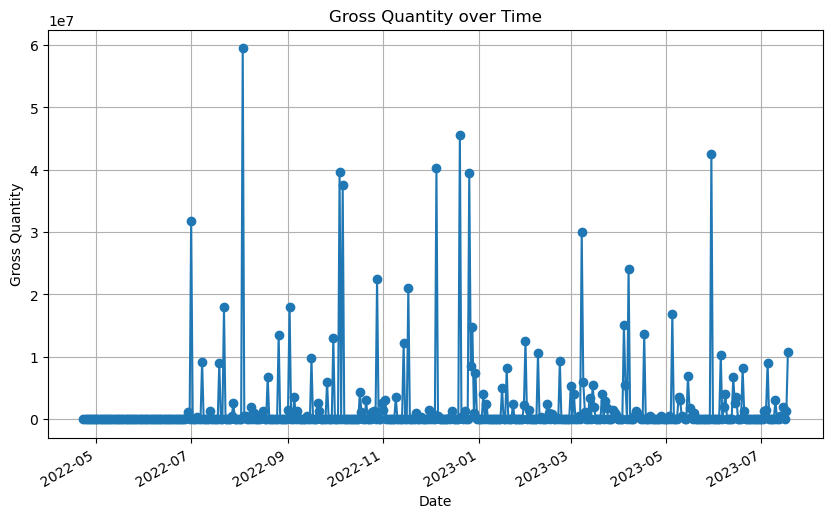

In [40]:
# Assuming sorted_product_gasoil is your Pandas Series
filtered_product_gasoil.plot(figsize=(10, 6), marker='o', linestyle='-')
plt.title('Gross Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Gross Quantity')
plt.grid(True)
plt.show()

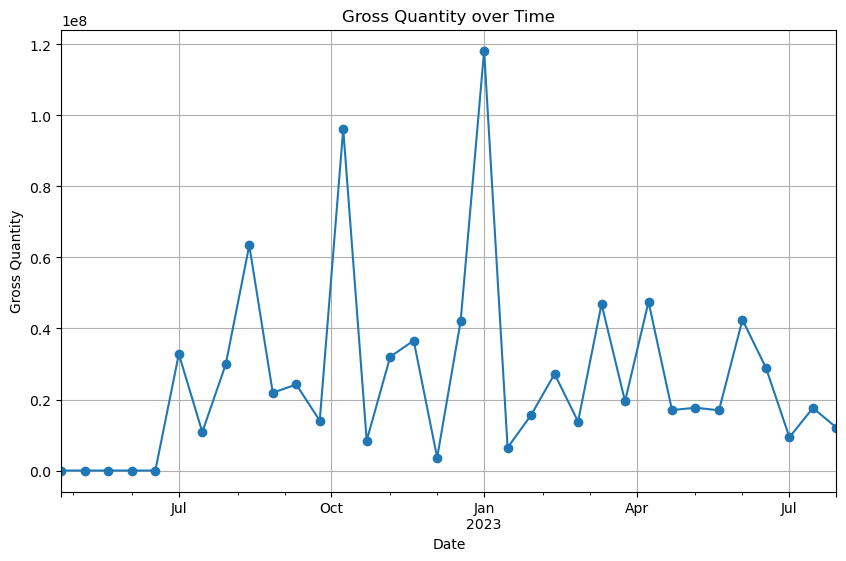

In [41]:
weekly_gasoil = filtered_product_gasoil.resample('2W').sum()
# Assuming sorted_product_gasoil is your Pandas Series
weekly_gasoil.plot(figsize=(10, 6), marker='o', linestyle='-')
plt.title('Gross Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Gross Quantity')
plt.grid(True)
plt.show()

### STATIONARITY TEST

In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(time_series):
    adf_result = adfuller(time_series)
    kpss_result = kpss(time_series)

    adf_p_value = adf_result[1]
    kpss_p_value = kpss_result[1]

    if adf_p_value <= 0.05:
        adf_msg = "ADF test: The series is stationary."
    else:
        adf_msg = "ADF test: The series is non-stationary."

    if kpss_p_value <= 0.05:
        kpss_msg = "KPSS test: The series is non-stationary."
    else:
        kpss_msg = "KPSS test: The series is stationary."

    return f"{adf_msg}\n{kpss_msg}\n"

In [43]:
# Check stationarity
result_message = check_stationarity(weekly_gasoil)
print(result_message)

ADF test: The series is stationary.
KPSS test: The series is stationary.



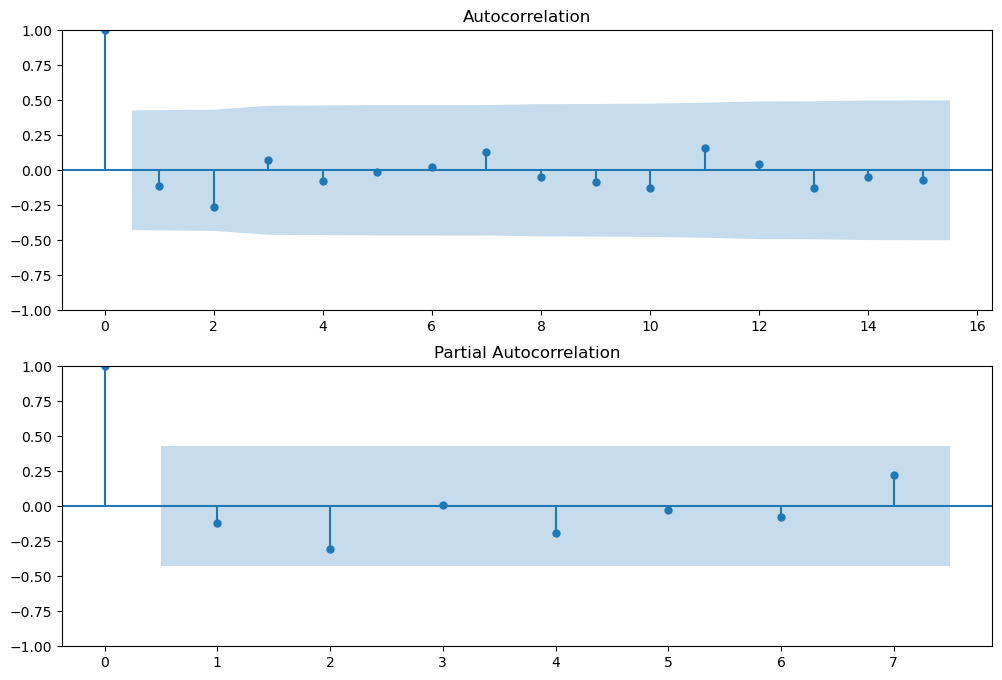

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
plot_acf(weekly_gasoil.iloc[13:], lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(weekly_gasoil.iloc[13:], lags=7, ax=ax2)
plt.show()

In [45]:
weekly_gasoil

2022-04-24            0
2022-05-08            0
2022-05-22            0
2022-06-05            0
2022-06-19            0
2022-07-03     32803374
2022-07-17     10819569
2022-07-31     29967799
2022-08-14     63419926
2022-08-28     21899824
2022-09-11     24232675
2022-09-25     14041362
2022-10-09     96181541
2022-10-23      8424494
2022-11-06     32036643
2022-11-20     36587577
2022-12-04      3632627
2022-12-18     42102549
2023-01-01    118273570
2023-01-15      6436053
2023-01-29     15623183
2023-02-12     27199488
2023-02-26     13785949
2023-03-12     46878001
2023-03-26     19497604
2023-04-09     47507538
2023-04-23     17012412
2023-05-07     17690000
2023-05-21     16958658
2023-06-04     42450000
2023-06-18     28923118
2023-07-02      9368292
2023-07-16     17612191
2023-07-30     12089892
Freq: 2W-SUN, Name: GROSS_QUANTITY, dtype: int64

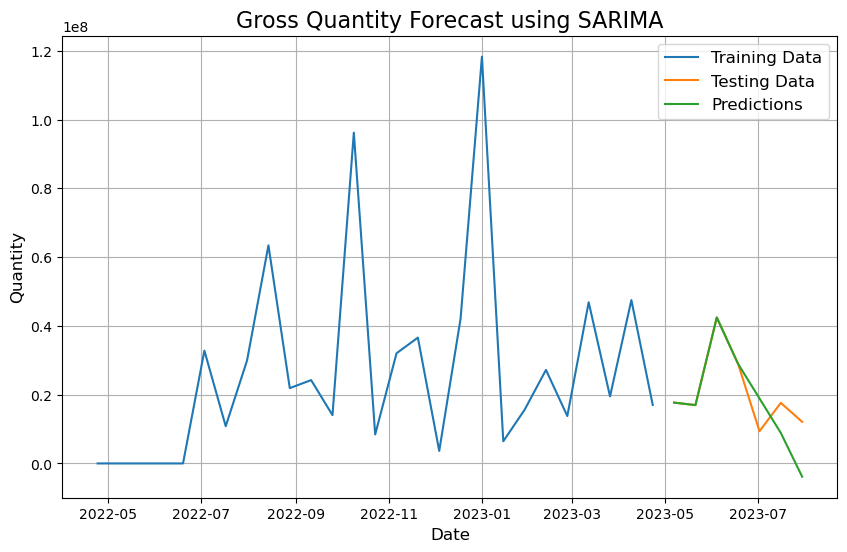

In [46]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
from sklearn.model_selection import train_test_split

train, test = train_test_split(weekly_gasoil, test_size=0.2, shuffle=False)

rolling_predictions = test.copy()
for end_date in test.index:
    train_data = weekly_gasoil[:end_date]  # Include end_date in training data
    try:
        model = SARIMAX(train_data, order=(0, 1, 0), seasonal_order=(2, 0, 1, 26))
        model_fit = model.fit()
        pred = model_fit.forecast(steps=1).astype(int)  # Forecast one step ahead
        rolling_predictions.loc[end_date] = pred[0]  # Assign forecasted value to correct index
    except Exception as e:
        # Handle specific exceptions
        print("Error occurred for date:", end_date)
        print("Error details:", str(e))

rolling_residuals = test - rolling_predictions

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(rolling_predictions, label='Predictions')

plt.legend(fontsize=12)
plt.title('Gross Quantity Forecast using SARIMA', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(True)
plt.show()

Error occurred for date: 2023-08-13 00:00:00
Error details: Schur decomposition solver error.
Error occurred for date: 2023-08-27 00:00:00
Error details: Schur decomposition solver error.
Error occurred for date: 2023-09-10 00:00:00
Error details: Schur decomposition solver error.
Error occurred for date: 2023-09-24 00:00:00
Error details: Schur decomposition solver error.
Error occurred for date: 2023-10-08 00:00:00
Error details: Schur decomposition solver error.


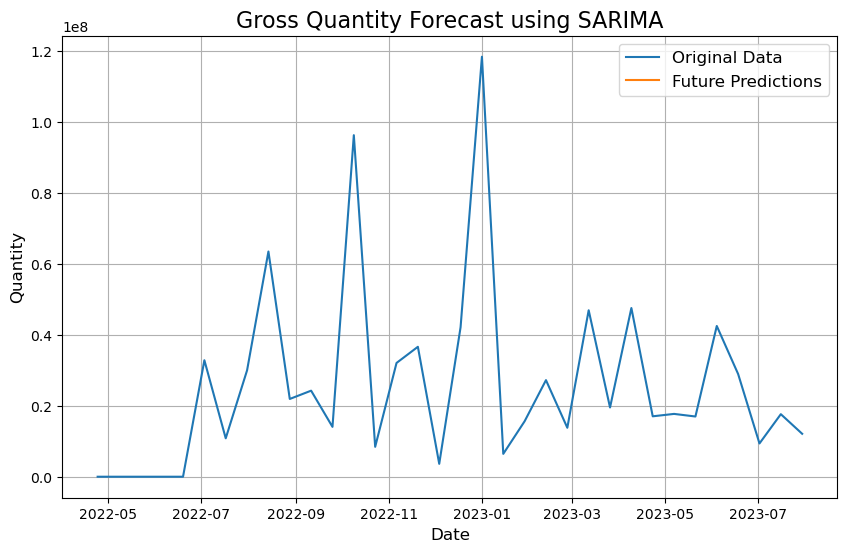

In [47]:
# Create empty series with index dates
future_dates = pd.Series(index=[
    datetime(2023, 8, 13),
    datetime(2023, 8, 27),
    datetime(2023, 9, 10),
    datetime(2023, 9, 24),
    datetime(2023, 10, 8)
])

# Initialize an empty dataframe to store predictions
future_predictions = pd.DataFrame(index=future_dates.index, columns=['Forecast'])

# Initial training data
train_data = weekly_gasoil

# Fitting the model and making predictions for each future date
for end_date in future_dates.index:
    try:
        model = SARIMAX(train_data, order=(2, 0, 2), seasonal_order=(2, 1,2 , 26))  # SARIMA with seasonal component
        model_fit = model.fit()
        pred = model_fit.forecast(steps=1)  # Forecast one step ahead
        future_predictions.loc[end_date] = pred[0]  # Assign forecasted value to correct index
        train_data = train_data._append(pd.Series(pred[0], index=[end_date]))
    except Exception as e:
        print("Error occurred for date:", end_date)
        print("Error details:", str(e))

plt.figure(figsize=(10, 6))

plt.plot(weekly_gasoil, label='Original Data')
plt.plot(future_predictions, label='Future Predictions')

plt.legend(fontsize=12)
plt.title('Gross Quantity Forecast using SARIMA', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


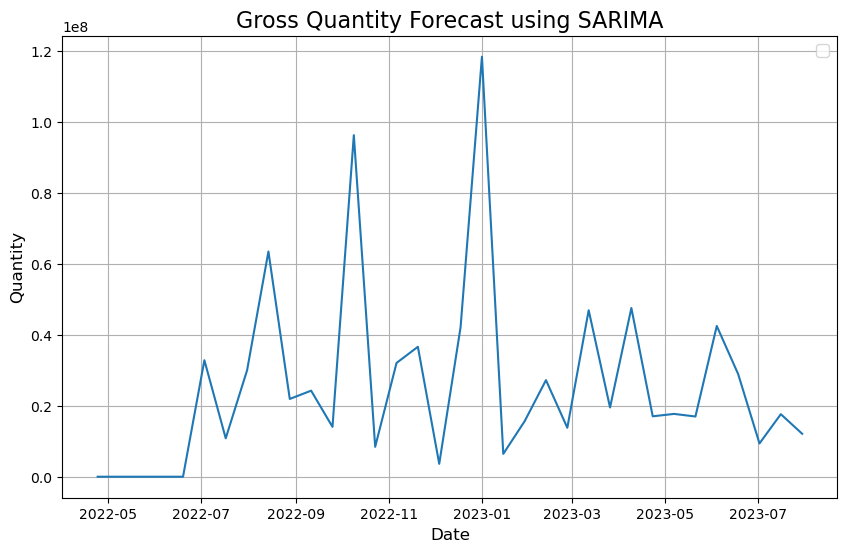

In [48]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_data)
plt.legend(fontsize=12)
plt.title('Gross Quantity Forecast using SARIMA', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(True)
plt.show()

--------------

In [49]:
product_mogas_group_by = product_mogas.groupby('FOLIO_NUMBER')['GROSS_QUANTITY'].sum()
product_mogas_group_by

FOLIO_NUMBER
2022-06-28    105245375
2022-06-29        13988
2022-06-30       100000
2022-07-01      5625466
2022-07-08      1988952
                ...    
2023-07-05      2100000
2023-07-13     10875473
2023-07-14       255823
2023-07-15       200000
2023-07-18       961933
Name: GROSS_QUANTITY, Length: 94, dtype: int64

In [50]:
sorted_product_mogas = product_mogas_group_by.sort_index()
sorted_product_mogas

FOLIO_NUMBER
2022-06-28    105245375
2022-06-29        13988
2022-06-30       100000
2022-07-01      5625466
2022-07-08      1988952
                ...    
2023-07-05      2100000
2023-07-13     10875473
2023-07-14       255823
2023-07-15       200000
2023-07-18       961933
Name: GROSS_QUANTITY, Length: 94, dtype: int64

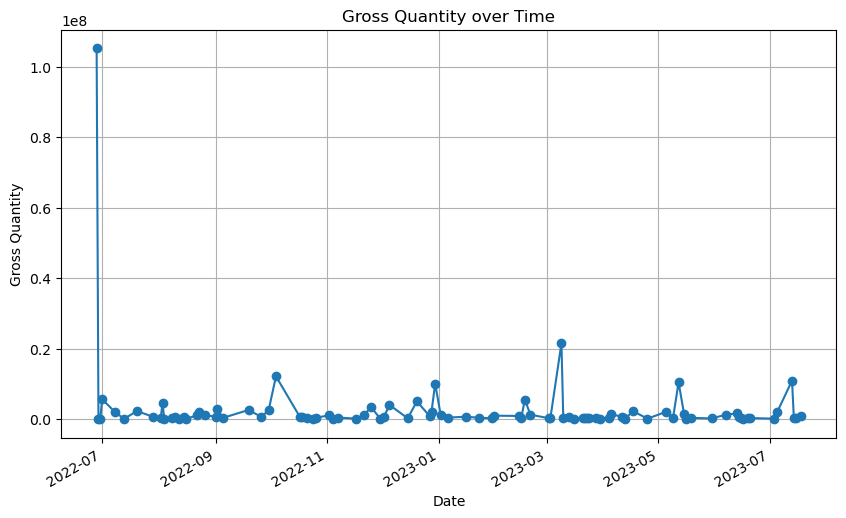

In [51]:
# Assuming sorted_product_gasoil is your Pandas Series
sorted_product_mogas.plot(figsize=(10, 6), marker='o', linestyle='-')
plt.title('Gross Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Gross Quantity')
plt.grid(True)
plt.show()

In [52]:
filtered_product_mogas = sorted_product_mogas[sorted_product_mogas <= 45245375]

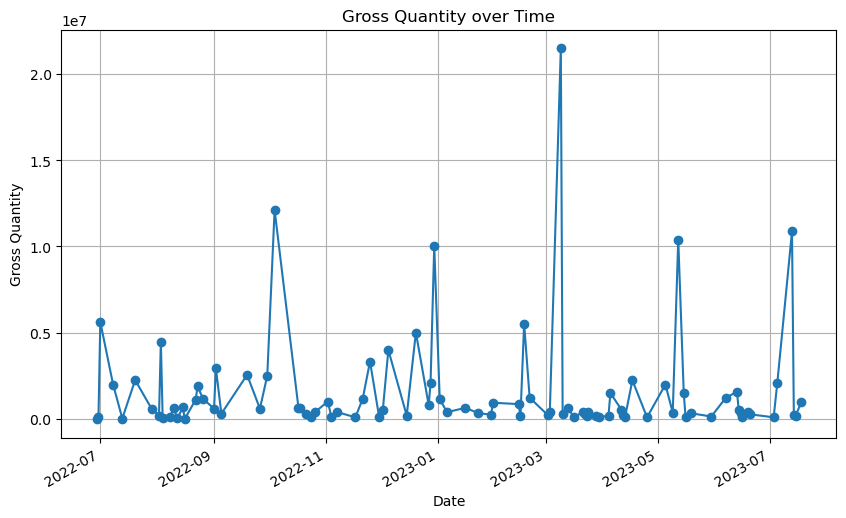

In [53]:
# Assuming sorted_product_gasoil is your Pandas Series
filtered_product_mogas.plot(figsize=(10, 6), marker='o', linestyle='-')
plt.title('Gross Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Gross Quantity')
plt.grid(True)
plt.show()

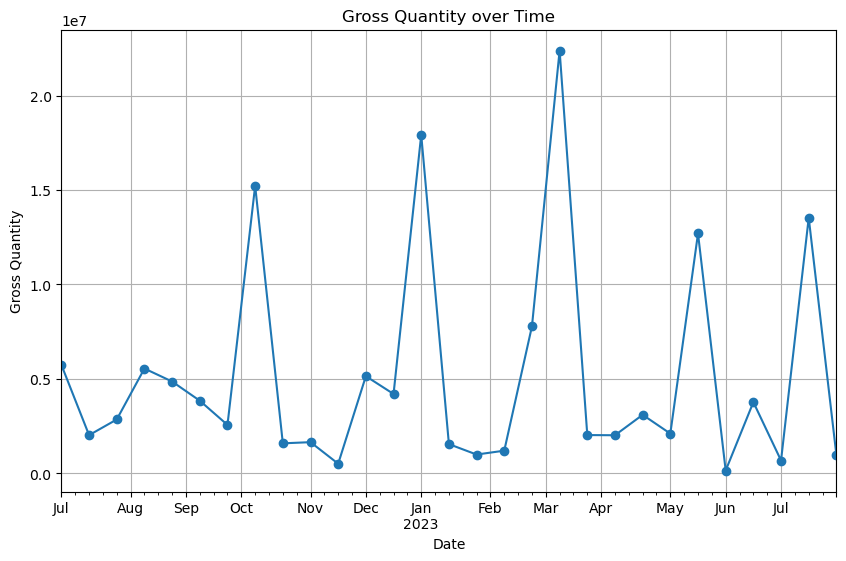

In [54]:
weekly_mogas = filtered_product_mogas.resample('2W').sum()
# Assuming sorted_product_gasoil is your Pandas Series
weekly_mogas.plot(figsize=(10, 6), marker='o', linestyle='-')
plt.title('Gross Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Gross Quantity')
plt.grid(True)
plt.show()

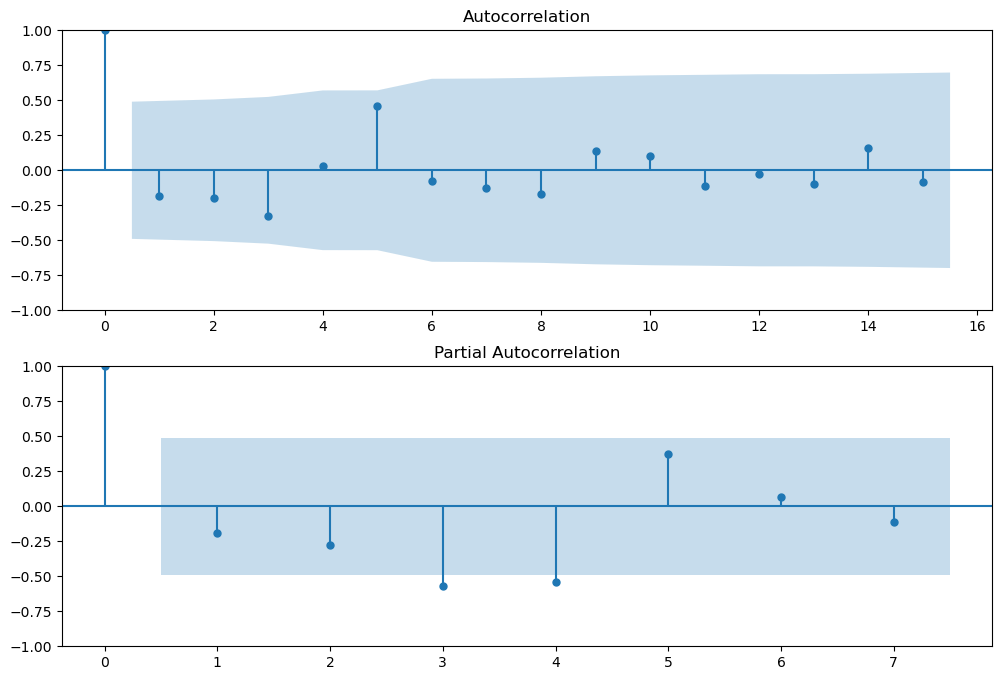

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
plot_acf(weekly_mogas.iloc[13:], lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(weekly_mogas.iloc[13:], lags=7, ax=ax2)
plt.show()


In [56]:
# Check stationarity
result_message = check_stationarity(weekly_mogas)
print(result_message)

ADF test: The series is stationary.
KPSS test: The series is stationary.



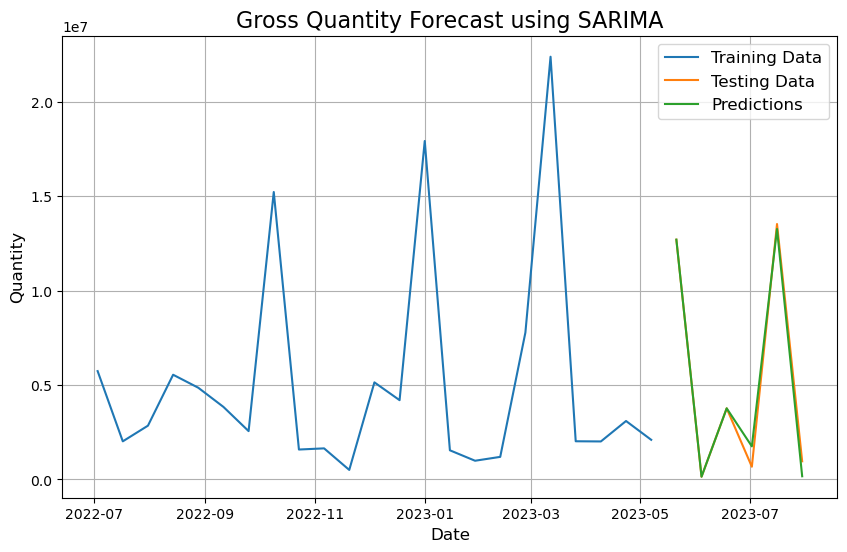

In [67]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
from sklearn.model_selection import train_test_split

train, test = train_test_split(weekly_mogas, test_size=0.2, shuffle=False)

rolling_predictions = test.copy()
for end_date in test.index:
    train_data = weekly_mogas[:end_date]  # Include end_date in training data
    try:
        model = SARIMAX(train_data, order=(0, 1, 0), seasonal_order=(2, 0, 1, 26))
        model_fit = model.fit()
        pred = model_fit.forecast(steps=1).astype(int)  # Forecast one step ahead
        rolling_predictions.loc[end_date] = pred[0]  # Assign forecasted value to correct index
    except Exception as e:
        # Handle specific exceptions
        print("Error occurred for date:", end_date)
        print("Error details:", str(e))

rolling_residuals = test - rolling_predictions

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(rolling_predictions, label='Predictions')

plt.legend(fontsize=12)
plt.title('Gross Quantity Forecast using SARIMA', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(True)
plt.show()

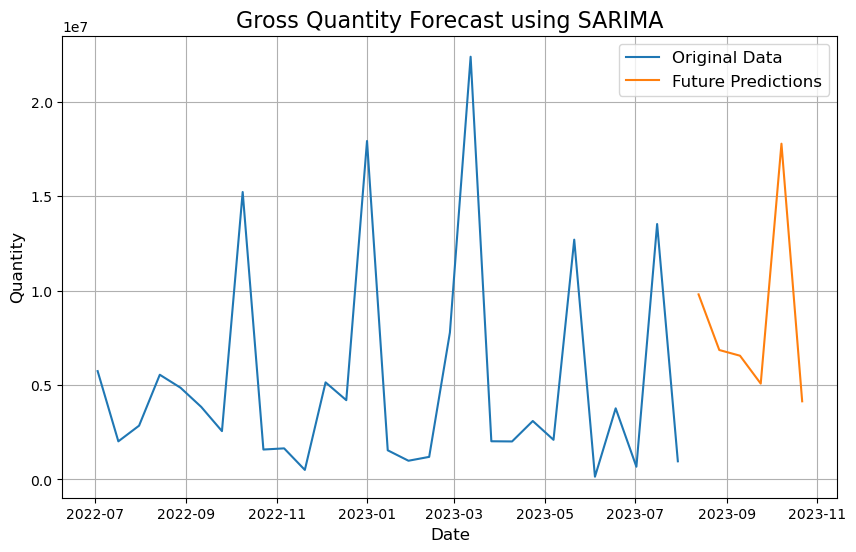

In [59]:
# Create empty series with index dates
future_dates = pd.Series(index=[
    datetime(2023, 8, 13),
    datetime(2023, 8, 27),
    datetime(2023, 9, 10),
    datetime(2023, 9, 24),
    datetime(2023, 10, 8),
    datetime(2023, 10, 22)
])

# Initialize an empty dataframe to store predictions
future_predictions = pd.DataFrame(index=future_dates.index, columns=['Forecast'])

# Initial training data
train_data = weekly_mogas

# Fitting the model and making predictions for each future date
for end_date in future_dates.index:
    try:
        model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(2, 1,2 , 26))  # SARIMA with seasonal component
        model_fit = model.fit()
        pred = model_fit.forecast(steps=1)  # Forecast one step ahead
        future_predictions.loc[end_date] = pred[0]  # Assign forecasted value to correct index
        train_data = train_data._append(pd.Series(pred[0], index=[end_date]))
    except Exception as e:
        print("Error occurred for date:", end_date)
        print("Error details:", str(e))

plt.figure(figsize=(10, 6))

plt.plot(weekly_mogas, label='Original Data')
plt.plot(future_predictions, label='Future Predictions')

plt.legend(fontsize=12)
plt.title('Gross Quantity Forecast using SARIMA', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


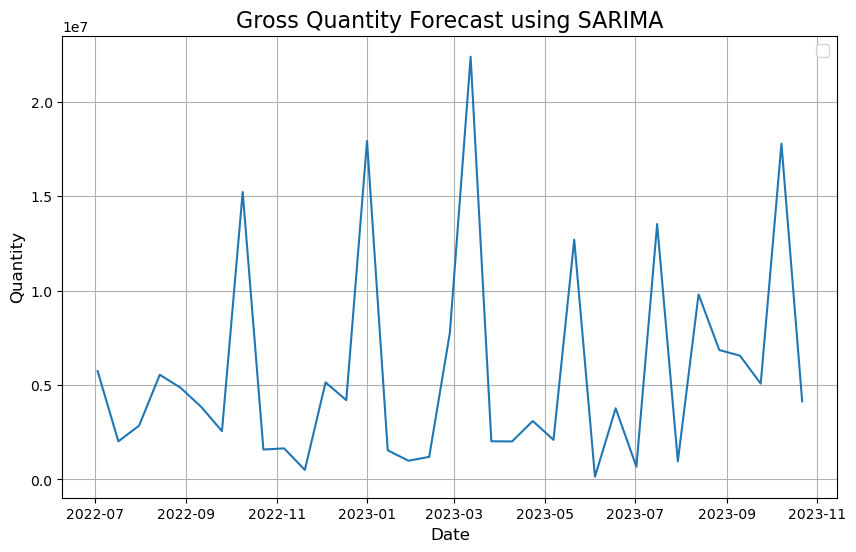

In [60]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_data)
plt.legend(fontsize=12)
plt.title('Gross Quantity Forecast using SARIMA', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(True)
plt.show()